# Лабораторная работа №6. Классификация изображений при помощи предобученных нейросетей.


## Цель работы
Изучить принципы работы предобученных нейронных сетей для классификации изображений, реализовать модель на основе transfer learning и провести эксперименты на данных.

## Задачи
1. Ознакомиться с концепцией transfer learning и предобученными сверточными нейронными сетями.
2. Выбрать датасет (можно использовать данные из прошлой лабораторной работы или взять любой другой).
3. Подготовить датасет, включая предобработку
4. Исследовать предложенные три архитектуры предобученных сетей, сравнить их результаты.
5. Адаптировать предобученные модели под задачу классификации
6. Провести обучение с замороженными и размороженными слоями.
7. Оценить качество моделей, вычислив метрики: Точность (Accuracy), Полноту (Recall), F1-score, Матрицу ошибок (Confusion Matrix)
8. Сравнить три архитектуры между собой и определить лучшую для
выбранной задачи.


## Индивидуальное задание
Номер варианта - 2.

Датасет: "Flowers Dataset" (классификация цветов).

Структуры: InceptionV3, MobileNetV2, DenseNet121





## Ход выполнения работы

Производится импорт необходимых библиотек.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import InceptionV3, MobileNetV2, DenseNet121

Загружаются данные, затем производится аугментация (заполнение дополнительными данными), в качестве размера, было принято решение взять изображение 75 на 75 пикселей, поскольку это минимальный размер для предобученных нейросетей

In [ ]:

# Настройка путей
train_dir = '/content/drive/MyDrive/Colab Notebooks/flowers/train'
img_size = (75, 75)  # Новый размер изображений
batch_size = 64       # Увеличенный размер батча
epochs = 12
IMG_SIZE = 75
NUM_CLASSES = 5

# Создание генераторов данных с аугментацией
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Разделение на train/val
)

# Тренировочный и валидационный наборы
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2222 images belonging to 5 classes.
Found 554 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Замороженная InceptionV3

Первой предобученной сетью будет InceptionV3, она создана Google и обучена на наборе из 1.2 миллиона изображений ImageNet. К замороженной сети добавляется 2 скрытых слоя для разделения по классам цветов.

In [ ]:
base_model_1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,
IMG_SIZE, 3))
base_model_1.trainable = False

x = Flatten()(base_model_1.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)
# Создаем модель
model = Model(inputs=base_model_1.input, outputs=x)
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Обучение модели
history_1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 758ms/step - accuracy: 0.3461 - loss: 1.7779 - val_accuracy: 0.5547 - val_loss: 1.0992
Epoch 2/12
 1/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4531 - loss: 1.3070

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.4531 - loss: 1.3070 - val_accuracy: 0.5645 - val_loss: 1.1359
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 458ms/step - accuracy: 0.6013 - loss: 1.0538 - val_accuracy: 0.5645 - val_loss: 1.0962
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.5312 - loss: 1.0173 - val_accuracy: 0.5938 - val_loss: 1.0761
Epoch 5/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 456ms/step - accuracy: 0.6381 - loss: 0.9397 - val_accuracy: 0.6309 - val_loss: 0.9460
Epoch 6/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6406 - loss: 0.9766 - val_accuracy: 0.6191 - val_loss: 0.9935
Epoch 7/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 452ms/step - accuracy: 0.6544 - loss: 0.9137 - val_accuracy: 0.6035 - val_loss: 1.0093
Epoch 8/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7500 - loss: 0.6666 - val_accuracy: 0.6074 - val_loss: 0.9931
Epoch 9/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 539ms/step - accuracy: 0.6776 - loss: 0.8654 - val_accuracy: 0.6133 - v

Обучение первой модели показало такие же результаты, как и нейронная сеть, написанная с нуля в прошлой лабораторной работе.

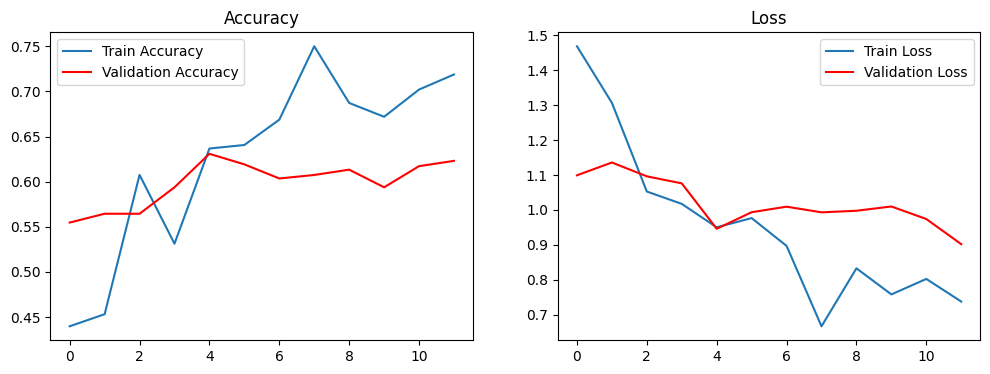

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step


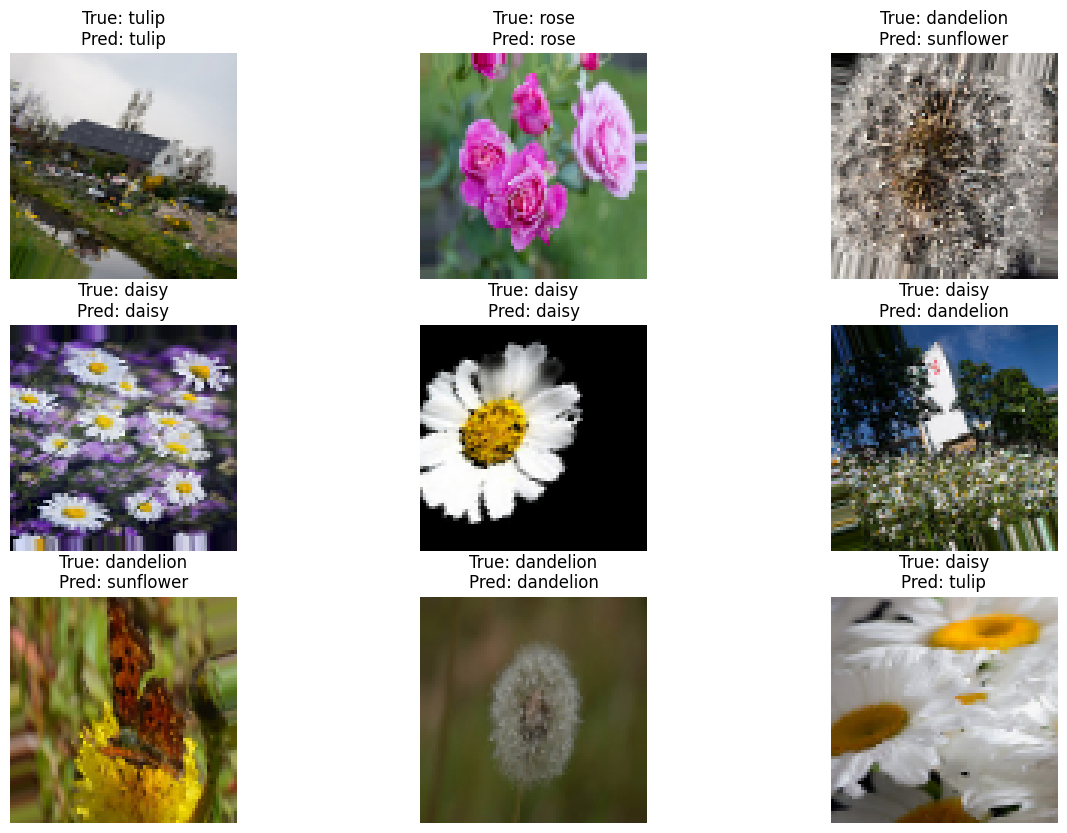

Found 554 images belonging to 5 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 880ms/step

Validation Metrics:
Accuracy: 0.6119
Recall: 0.6120
F1-score: 0.6089

Confusion Matrix:
[[73 10  7  3  7]
 [14 78  3 23 11]
 [ 8  3 42 18 28]
 [ 3  8  5 75 14]
 [ 9  5 10 26 71]]


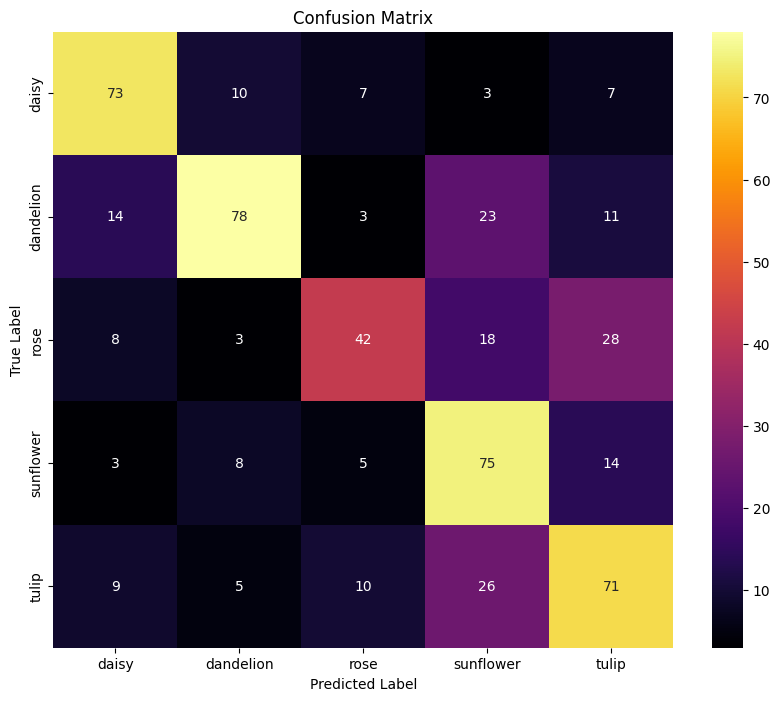

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss')
plt.legend()
plt.show()

# Примеры предсказаний на валидационных данных
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для корректного сопоставления меток
)

# Получаем предсказания для валидационных данных
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Получаем истинные метки
y_true = validation_generator.classes

# Обрезаем метки до количества предсказаний (на случай неполного последнего батча)
y_true = y_true[:len(y_pred)]

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Выводим результаты
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

По метрикам точность сети составляет 63%, матрица ошибок показывает то, что большинство изображений распознаются правильно, проблемы возникают в различии тюльпанов и роз.

Далее полностью размораживаются слои сети InceptionV3


### Размороженная InceptionV3

In [ ]:
base_model_2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,
IMG_SIZE, 3))
# Размораживаем все слои модели для обучения
base_model_2.trainable = True
# Создаем новый классификационный блок
x = Flatten()(base_model_2.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)
# Создаем финальную модель
model = Model(inputs=base_model_2.input, outputs=x)
# Компилируем модель
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])


In [ ]:
# Обучение модели
history_2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.2899 - loss: 1.6294 - val_accuracy: 0.1543 - val_loss: 38.8400
Epoch 2/12
 1/34 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.5000 - loss: 1.1247

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.5000 - loss: 1.1247 - val_accuracy: 0.1543 - val_loss: 31.3962
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 869ms/step - accuracy: 0.5081 - loss: 1.2469 - val_accuracy: 0.1543 - val_loss: 432.0004
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6562 - loss: 1.9492 - val_accuracy: 0.1504 - val_loss: 423.6738
Epoch 5/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 454ms/step - accuracy: 0.6908 - loss: 0.9150 - val_accuracy: 0.3281 - val_loss: 10.3281
Epoch 6/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7500 - loss: 0.7582 - val_accuracy: 0.3457 - val_loss: 11.4623
Epoch 7/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 463ms/step - accuracy: 0.7639 - loss: 0.6650 - val_accuracy: 0.5449 - val_loss: 2.7888
Epoch 8/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.7656 - loss: 0.8225 - val_accuracy: 0.5488 - val_loss: 2.5126
Epoch 9/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.8128 - loss: 0.6140 - val_accuracy: 0.67

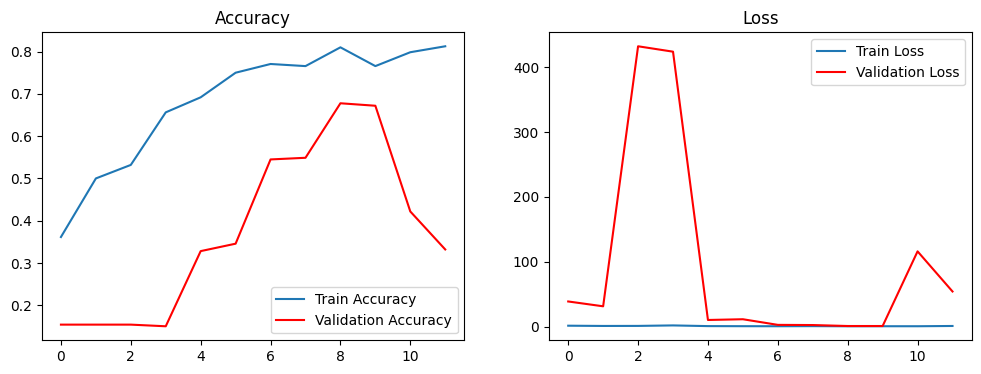

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


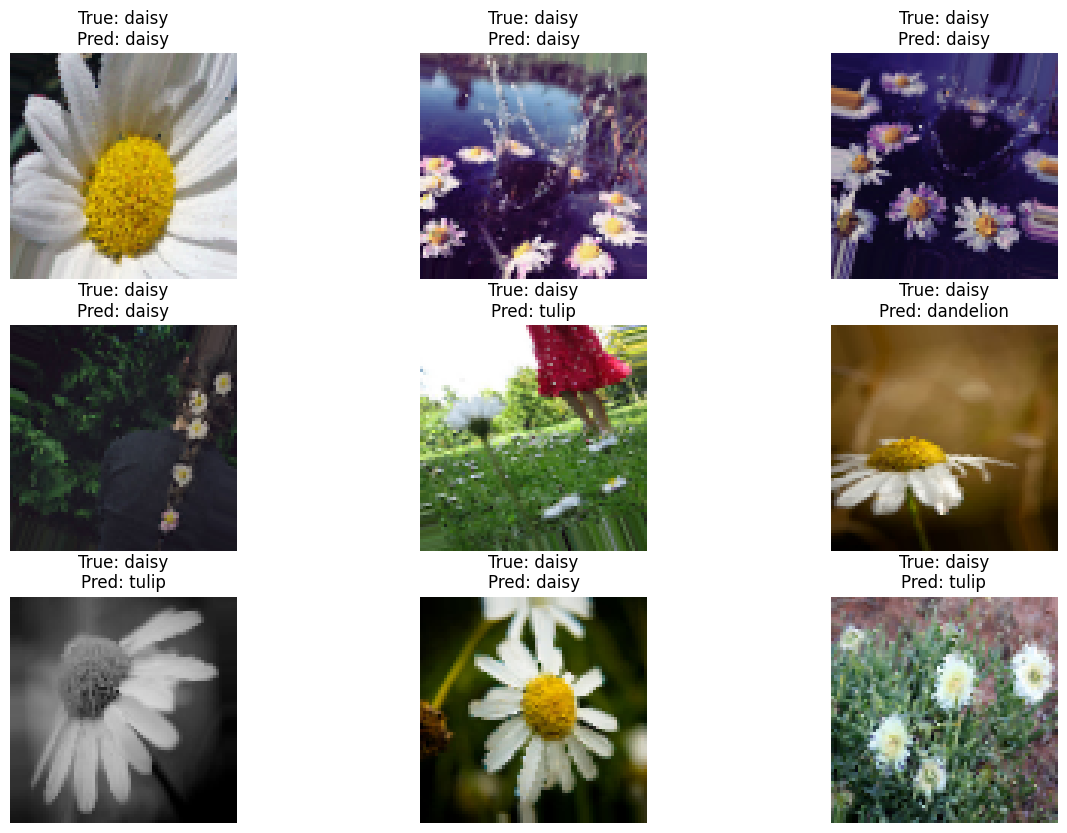

Found 554 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 985ms/step

Validation Metrics:
Accuracy: 0.3971
Recall: 0.3816
F1-score: 0.3484

Confusion Matrix:
[[ 48  11   0   0  41]
 [  2  37   0   0  90]
 [  4   5   5   0  85]
 [  4   8   0  13  80]
 [  1   2   0   1 117]]


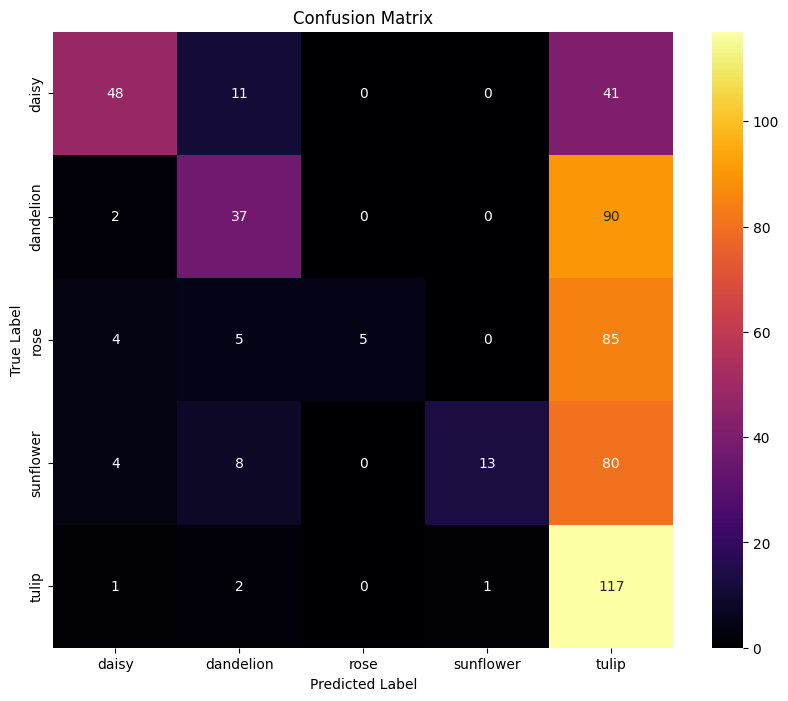

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss')
plt.legend()
plt.show()

# Примеры предсказаний на валидационных данных
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для корректного сопоставления меток
)

# Получаем предсказания для валидационных данных
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Получаем истинные метки
y_true = validation_generator.classes

# Обрезаем метки до количества предсказаний (на случай неполного последнего батча)
y_true = y_true[:len(y_pred)]

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Выводим результаты
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

По результатам видно, что размораживать все слои для такой задачи – плохая идея. Модель переобучается и плохо работает на валидационных данных. По метрикам точность составила 43%, по матрице ошибок видно, что модель распознает большинство цветов как тюльпаны.

### Замороженная MobileNetV2

Далее производится аналогичная работа с моделью MobileNetV2. Она также была разработана Google, имеет схожую архитектуру с Inception, но оптимизирована для работы во встраиваемых и мобильных приложениях. Для начала обучается MobileNetV2 с замороженными слоями.

In [ ]:
base_model_3 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,
IMG_SIZE, 3))
base_model_3.trainable = False

x = Flatten()(base_model_3.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)
# Создаем модель
model = Model(inputs=base_model_3.input, outputs=x)
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

<ipython-input-33-65f7c87f99dc>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_3 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,


In [ ]:
# Обучение модели
history_3 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 616ms/step - accuracy: 0.3728 - loss: 5.3651 - val_accuracy: 0.5312 - val_loss: 1.0912
Epoch 2/12
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5469 - loss: 1.2378

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5469 - loss: 1.2378 - val_accuracy: 0.5430 - val_loss: 1.0652
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 457ms/step - accuracy: 0.5394 - loss: 1.1180 - val_accuracy: 0.6230 - val_loss: 0.9454
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.5625 - loss: 0.8883 - val_accuracy: 0.5781 - val_loss: 0.9937
Epoch 5/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - accuracy: 0.5920 - loss: 1.0107 - val_accuracy: 0.6406 - val_loss: 0.9264
Epoch 6/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.5781 - loss: 1.1259 - val_accuracy: 0.6230 - val_loss: 0.9553
Epoch 7/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - accuracy: 0.6113 - loss: 0.9746 - val_accuracy: 0.6270 - val_loss: 0.9977
Epoch 8/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.6250 - loss: 0.8853 - val_accuracy: 0.6133 - val_loss: 0.9834
Epoch 9/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 589ms/step - accuracy: 0.5994 - loss: 0.9716 - val_accuracy: 0.6699 - v

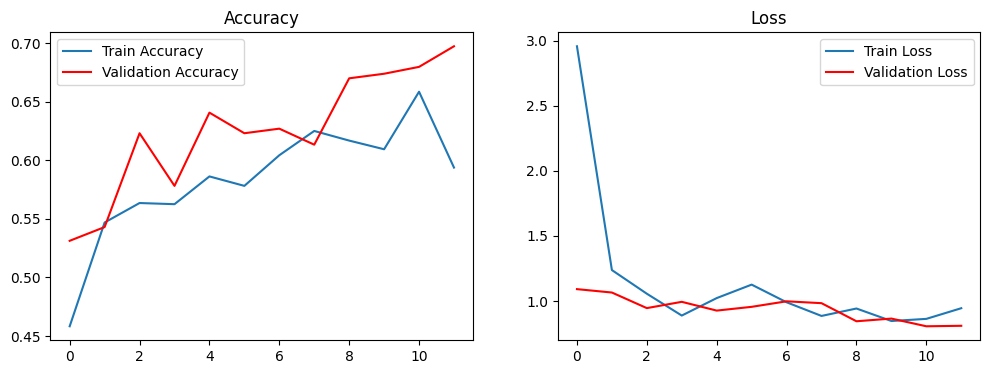

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


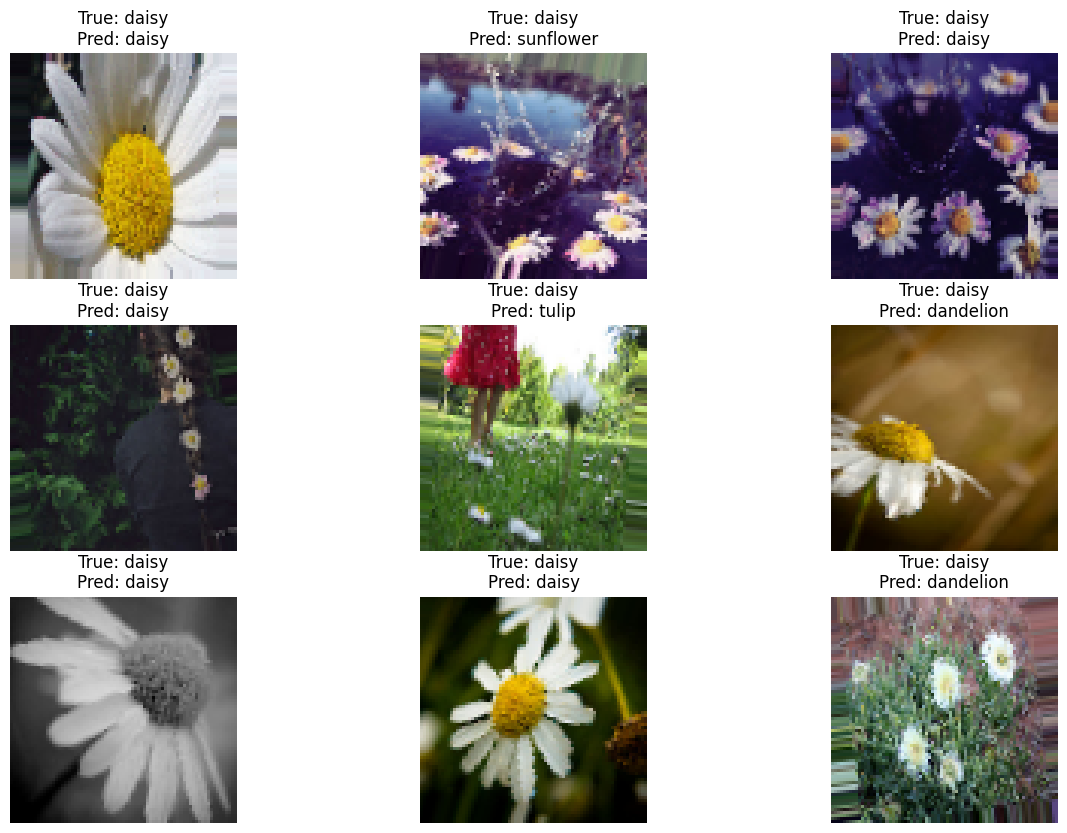

Found 554 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 752ms/step

Validation Metrics:
Accuracy: 0.7166
Recall: 0.7074
F1-score: 0.7102

Confusion Matrix:
[[ 61  25   3   4   7]
 [  9 102   5   7   6]
 [  7   2  58   4  28]
 [ 10  12   3  76   4]
 [  2   5   5   9 100]]


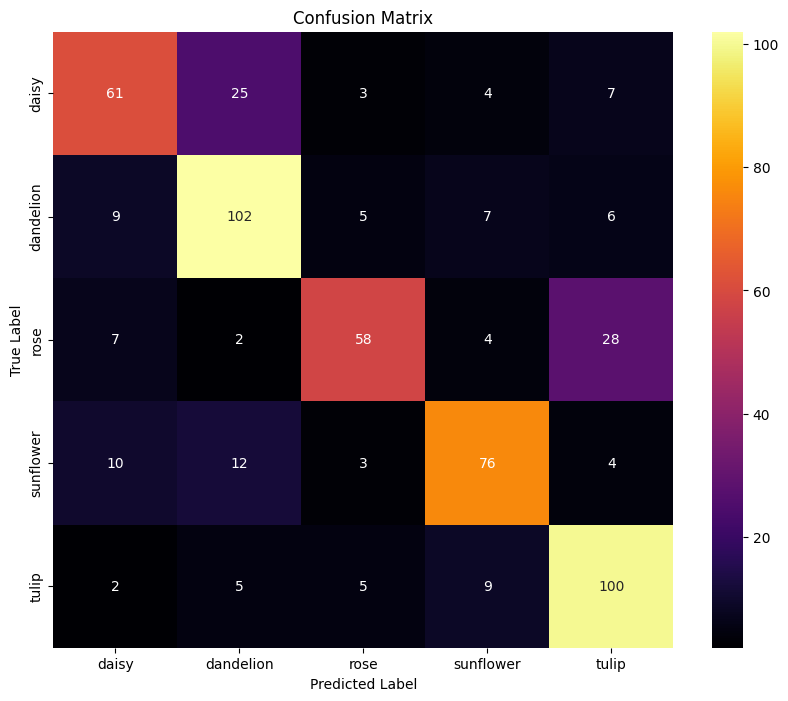

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss')
plt.legend()
plt.show()

# Примеры предсказаний на валидационных данных
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для корректного сопоставления меток
)

# Получаем предсказания для валидационных данных
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Получаем истинные метки
y_true = validation_generator.classes

# Обрезаем метки до количества предсказаний (на случай неполного последнего батча)
y_true = y_true[:len(y_pred)]

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Выводим результаты
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Данная модель имеет показатель точности такой же, как и InceptionV3 (66%), но наблюдаются сильные проблемы в различии тюльпанов и роз (в наборе данных изображения с этими цветами и вправду похожи, даже мне тяжело отличать их).

### Размороженная MobileNetV2

Далее размораживаются последние 4 слоя модели и производится обучение на этих же данных.

In [ ]:
base_model_4 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,
IMG_SIZE, 3))
# Замораживаем все слои модели
base_model_4.trainable = False
# Размораживаем только последние 4 слоя
for layer in base_model_4.layers[-4:]:
 layer.trainable = True
# Создаем новый классификационный блок
x = Flatten()(base_model_4.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)
# Создаем финальную модель
model = Model(inputs=base_model_4.input, outputs=x)
# Компилируем модель
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])


<ipython-input-36-69bed9aee53f>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_4 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,


In [ ]:
# Обучение модели
history_4 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 666ms/step - accuracy: 0.4496 - loss: 2.6219 - val_accuracy: 0.5918 - val_loss: 1.0371
Epoch 2/12
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6562 - loss: 1.0665

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6562 - loss: 1.0665 - val_accuracy: 0.6172 - val_loss: 0.9644
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 607ms/step - accuracy: 0.6785 - loss: 0.8480 - val_accuracy: 0.6699 - val_loss: 0.9206
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.6406 - loss: 1.0070 - val_accuracy: 0.6582 - val_loss: 0.9479
Epoch 5/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 447ms/step - accuracy: 0.7283 - loss: 0.7616 - val_accuracy: 0.6738 - val_loss: 0.9669
Epoch 6/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.7188 - loss: 0.7906 - val_accuracy: 0.6328 - val_loss: 1.0688
Epoch 7/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 618ms/step - accuracy: 0.7269 - loss: 0.7045 - val_accuracy: 0.6992 - val_loss: 0.8277
Epoch 8/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.7812 - loss: 0.7269 - val_accuracy: 0.6875 - val_loss: 0.8193
Epoch 9/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - accuracy: 0.7509 - loss: 0.6820 - val_accuracy: 0.6914 - v

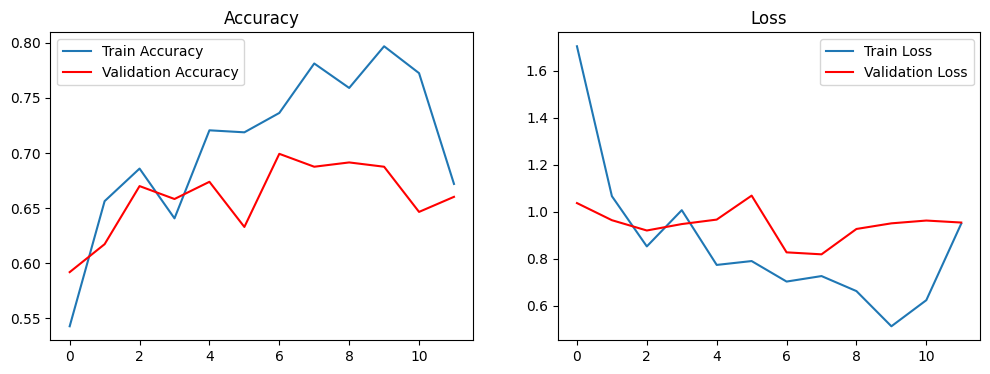

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step


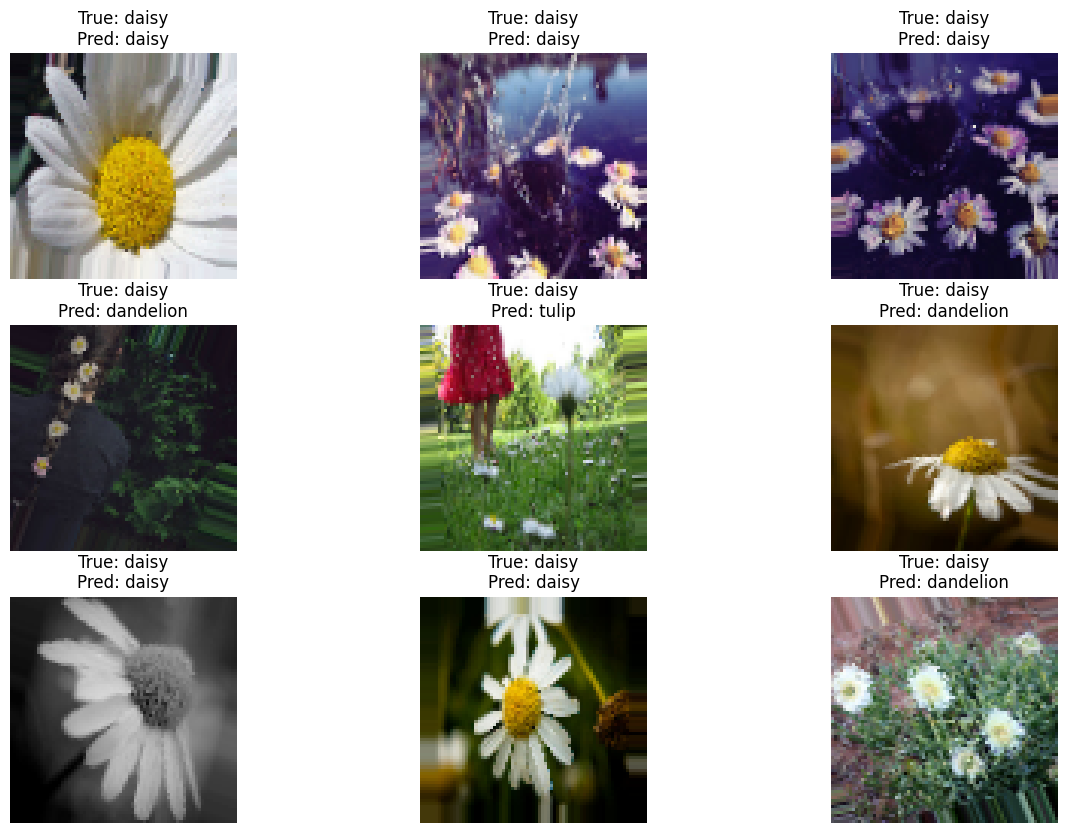

Found 554 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 730ms/step

Validation Metrics:
Accuracy: 0.6191
Recall: 0.6102
F1-score: 0.6123

Confusion Matrix:
[[ 51  40   3   5   1]
 [  2 121   1   3   2]
 [  4  13  63   7  12]
 [  3  38   4  59   1]
 [  5  30  27  10  49]]


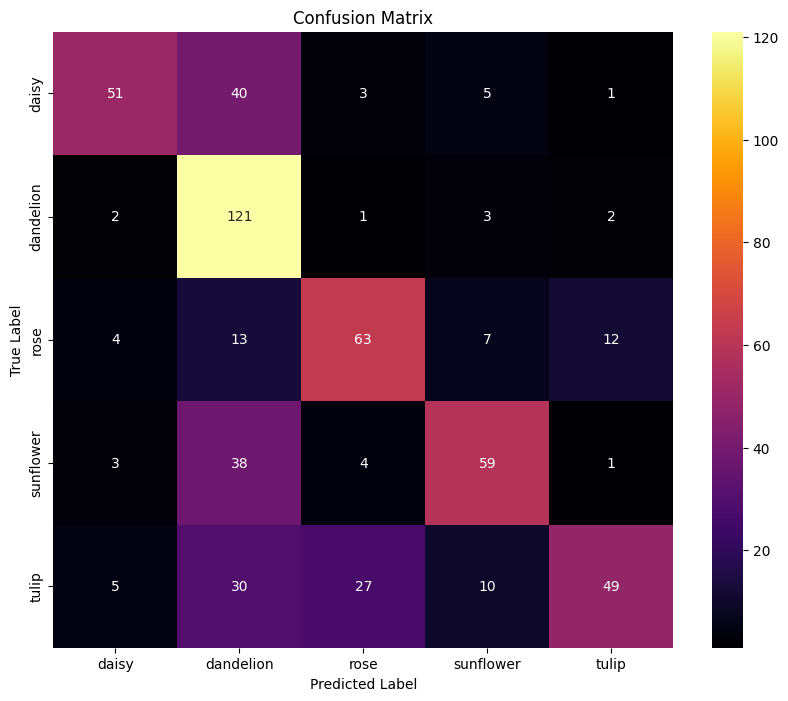

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss')
plt.legend()
plt.show()

# Примеры предсказаний на валидационных данных
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для корректного сопоставления меток
)

# Получаем предсказания для валидационных данных
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Получаем истинные метки
y_true = validation_generator.classes

# Обрезаем метки до количества предсказаний (на случай неполного последнего батча)
y_true = y_true[:len(y_pred)]

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Выводим результаты
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

После разморозки 4 последних слоев модели, увеличилась общая точность (с 66% до 70%), но модель стала хуже отличать ромашки. Проблема с розами и тюльпанами осталась, но выражена не так ярко.

### Замороженная DenseNet121

Последней предобученной моделью является DenseNet121, она имеет 121 слой, содержит bottleneck слои (слои для снижения размерности признаков до 1х1), а также имеет плотную связь между слоями. Теоретически, данная модель должна показать лучший результат. Все слои замораживаются и происходит обучение.

In [ ]:
base_model_5 = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,
IMG_SIZE, 3))
base_model_5.trainable = False

x = Flatten()(base_model_5.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)
# Создаем модель
model = Model(inputs=base_model_5.input, outputs=x)
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Обучение модели
history_5 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4034 - loss: 3.0817 - val_accuracy: 0.6602 - val_loss: 0.8971
Epoch 2/12
 1/34 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5938 - loss: 1.0555

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.5938 - loss: 1.0555 - val_accuracy: 0.6680 - val_loss: 0.8852
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6995 - loss: 0.8255 - val_accuracy: 0.6934 - val_loss: 0.7930
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6719 - loss: 0.8449 - val_accuracy: 0.7305 - val_loss: 0.7523
Epoch 5/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7410 - loss: 0.6932 - val_accuracy: 0.7207 - val_loss: 0.7138
Epoch 6/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.7344 - loss: 0.5444 - val_accuracy: 0.7578 - val_loss: 0.6989
Epoch 7/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7688 - loss: 0.6227 - val_accuracy: 0.7441 - val_loss: 0.6971
Epoch 8/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.7812 - loss: 0.6079 - val_accuracy: 0.7480 - val_loss: 0.7001
Epoch 9/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 527ms/step - accuracy: 0.8001 - loss: 0.5876 - val_accuracy: 0.7324 - val_loss:

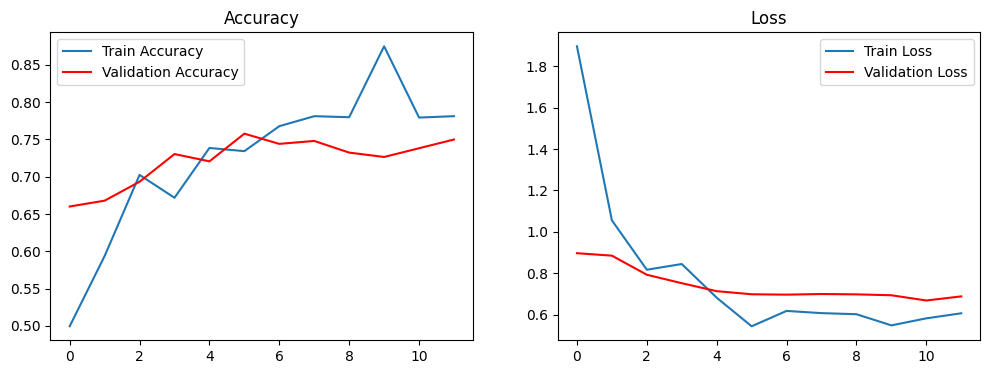

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step


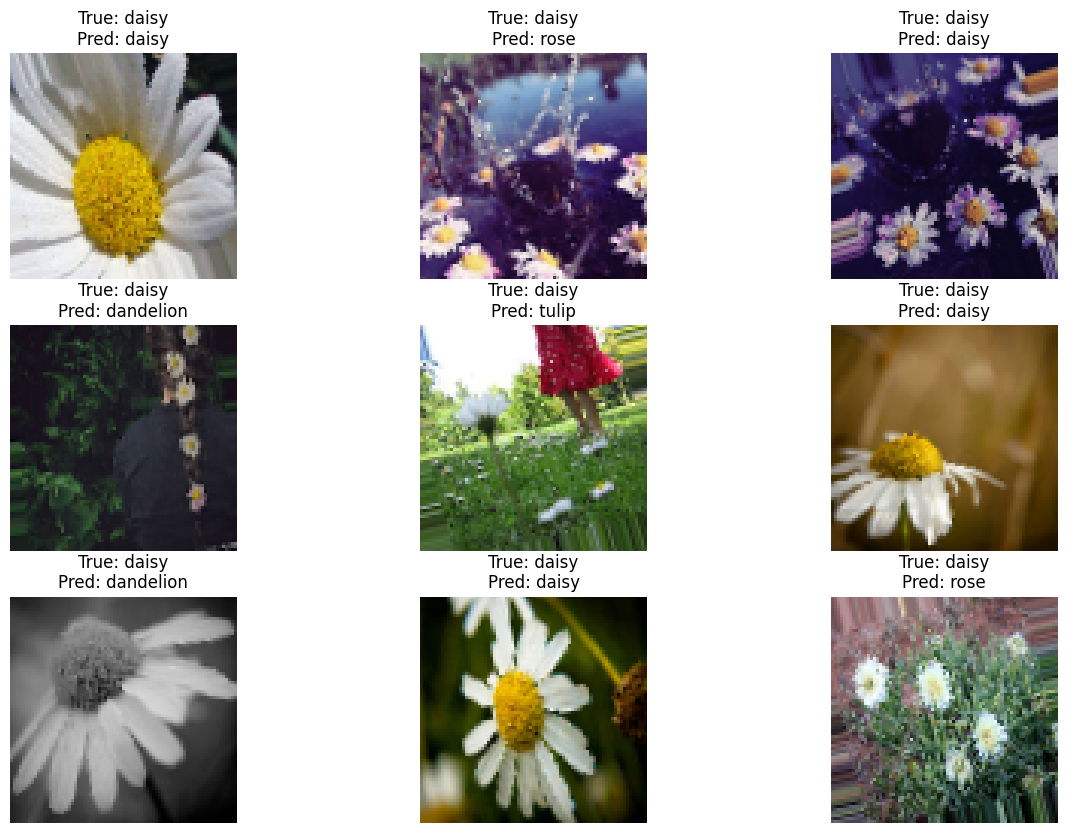

Found 554 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step

Validation Metrics:
Accuracy: 0.7599
Recall: 0.7578
F1-score: 0.7592

Confusion Matrix:
[[ 75  12   5   4   4]
 [  8 101   1  10   9]
 [  4   2  67   3  23]
 [  5   4   1  86   9]
 [  2   1  15  11  92]]


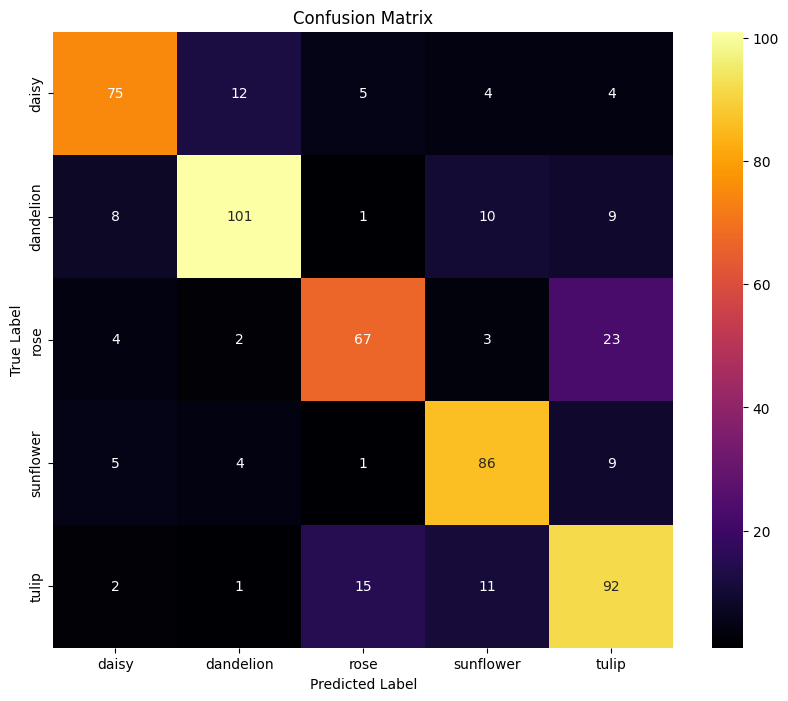

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss')
plt.legend()
plt.show()

# Примеры предсказаний на валидационных данных
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для корректного сопоставления меток
)

# Получаем предсказания для валидационных данных
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Получаем истинные метки
y_true = validation_generator.classes

# Обрезаем метки до количества предсказаний (на случай неполного последнего батча)
y_true = y_true[:len(y_pred)]

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Выводим результаты
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Как и было предсказано, эта модель имеет наивысшую точность (около 75%), но даже у этой архитектуры наблюдаются проблемы с отличием роз от тюльпанов. Скорее всего обучающий набор данных содержит слишком скудные сведения об этих цветах, поэтому и такой результат. Разморозим последние 4 слоя модели и проведем обучение снова.

###Размороженная DenseNet121

In [ ]:
base_model_6 = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,
IMG_SIZE, 3))
# Замораживаем все слои модели
base_model_6.trainable = False
# Размораживаем только последние 4 слоя
for layer in base_model_6.layers[-4:]:
 layer.trainable = True
# Создаем новый классификационный блок
x = Flatten()(base_model_6.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)
# Создаем финальную модель
model = Model(inputs=base_model_6.input, outputs=x)
# Компилируем модель
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Обучение модели
history_6 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4408 - loss: 2.4778 - val_accuracy: 0.6738 - val_loss: 0.8239
Epoch 2/12
 1/34 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6719 - loss: 0.8781

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.6719 - loss: 0.8781 - val_accuracy: 0.6953 - val_loss: 0.8231
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 51s 495ms/step - accuracy: 0.7240 - loss: 0.7379 - val_accuracy: 0.7344 - val_loss: 0.7654
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8125 - loss: 0.5208 - val_accuracy: 0.7480 - val_loss: 0.6980
Epoch 5/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 486ms/step - accuracy: 0.7509 - loss: 0.6838 - val_accuracy: 0.7441 - val_loss: 0.6855
Epoch 6/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.7812 - loss: 0.6596 - val_accuracy: 0.7402 - val_loss: 0.7367
Epoch 7/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 478ms/step - accuracy: 0.7718 - loss: 0.6071 - val_accuracy: 0.7539 - val_loss: 0.7236
Epoch 8/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8438 - loss: 0.4854 - val_accuracy: 0.6992 - val_loss: 0.7480
Epoch 9/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - accuracy: 0.7782 - loss: 0.5871 - val_accuracy: 0.7266 - v

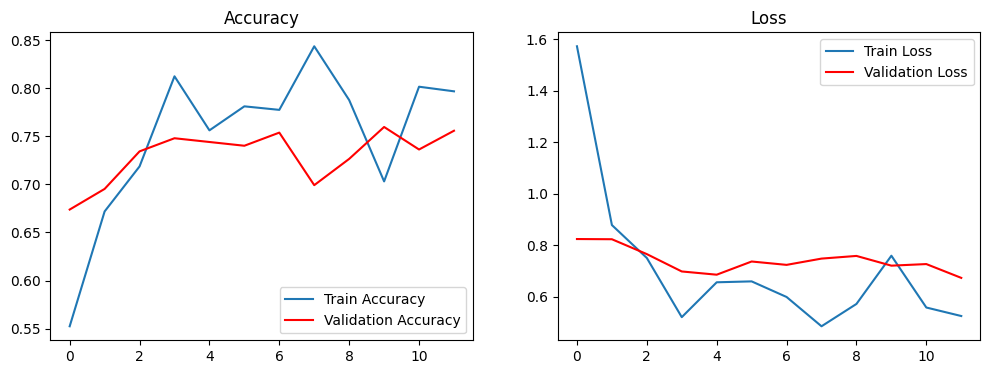

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step


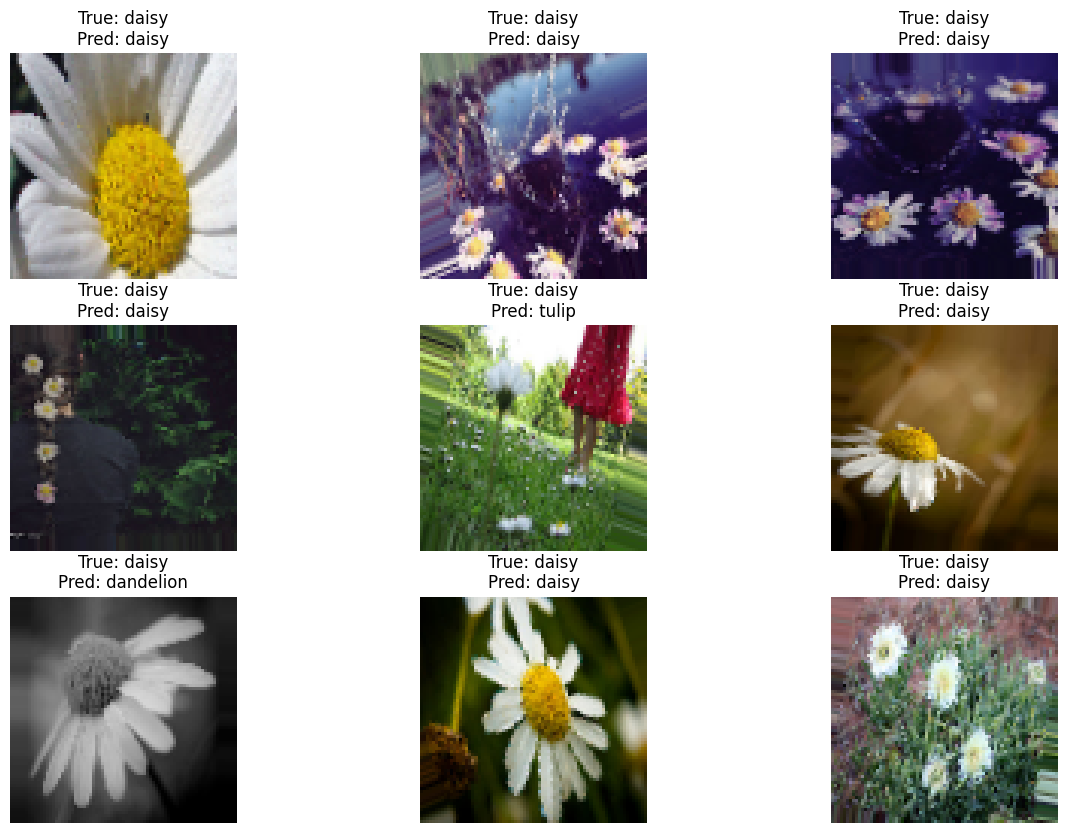

Found 554 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step

Validation Metrics:
Accuracy: 0.7708
Recall: 0.7714
F1-score: 0.7693

Confusion Matrix:
[[ 83   8   0   3   6]
 [ 14  90   2  12  11]
 [  5   2  65   5  22]
 [  5   5   5  88   2]
 [  4   1   9   6 101]]


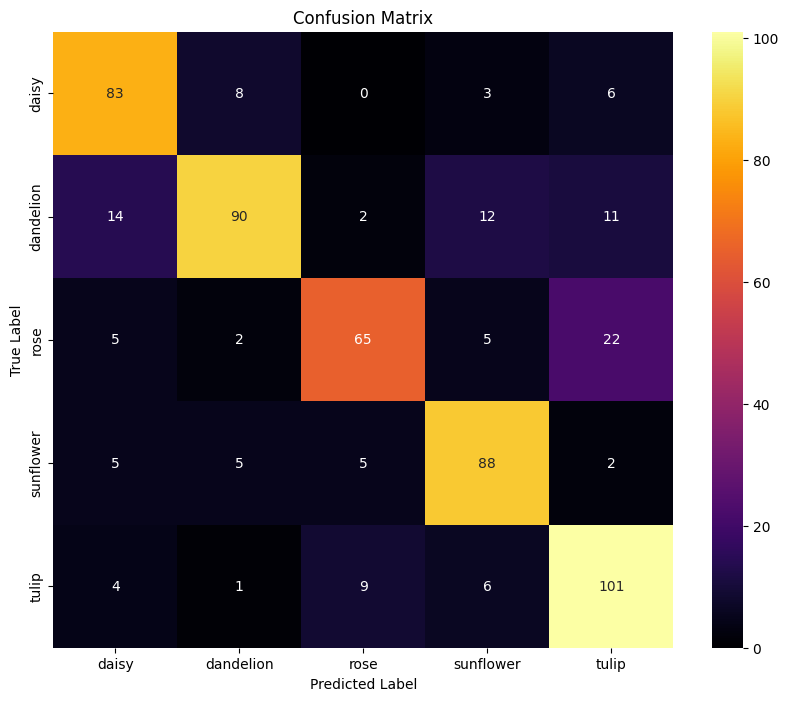

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss')
plt.legend()
plt.show()

# Примеры предсказаний на валидационных данных
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(val_images[i])
    true_label = class_names[np.argmax(val_labels[i])]
    pred_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Важно для корректного сопоставления меток
)

# Получаем предсказания для валидационных данных
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Получаем истинные метки
y_true = validation_generator.classes

# Обрезаем метки до количества предсказаний (на случай неполного последнего батча)
y_true = y_true[:len(y_pred)]

# Вычисляем метрики
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Выводим результаты
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Визуализация матрицы ошибок
class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Точность сети упала на 5% (с 70 до 65), что говорит о том, что структура сети была настроена верно, и разморозка слоев нарушила эту структуру.

## Вывод
В ходе выполнения лабораторной работы были изучены архитектуры сетей InceptionV3, MobileNetV2, DenseNet121. Было выявлено, что наиболее стабильной в узкой классификации изображений является DenseNet121. В случае, когда придется отличать изображения на более крупные классы (отличать человека от машины, к примеру), следует использовать InceptionV3, а в случае с внедрением модели в приложение на слабом устройстве, подойдет MobileNetV2. Размораживать слои стоит у тех предобученных моделей, чья изначальная цель не совпадает с нашей, именно поэтому DenseNet121 лучше справляется без разморозки, а остальные модели приходится дообучать.